In [30]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [31]:
df = pd.read_csv('data/productionGE_weather_2020.csv')
df.head()

,DATE,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,index,TM,FFM,UM,RR
0,20200101,5415.604167,963.562500,12030.937500,373.270833,10.500000,986.895833,-159.291667,119.916667,30528,-1.4,1.9,97.0,0.0
1,20200102,5896.416667,1651.708333,11990.520833,770.833333,12.750000,991.666667,-107.791667,121.270833,30529,2.0,3.6,95.0,0.0
2,20200103,5795.541667,1251.000000,10793.229167,2020.750000,8.625000,898.083333,-116.541667,123.104167,30530,6.3,6.4,91.0,3.4
3,20200104,5479.083333,1079.333333,11697.937500,547.520833,29.750000,848.083333,-132.708333,124.083333,30531,3.8,3.1,90.0,0.0
4,20200105,5355.791667,1662.229167,11664.583333,75.354167,34.916667,869.687500,-75.270833,123.666667,30532,2.9,1.4,90.0,0.0


**train and test split**


In [32]:
# select features and targets
# features: Consommation, TM, FFM, UM, RR
# targets : Thermique, Nucléaire, Eolien, Solaire, Hydraulique, Pompage, Bioénergies,

X = df[['Consommation', 'TM', 'FFM', 'UM', 'RR']].astype('float32')
y = df[['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies']].astype('float32')

# split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=False, test_size=0.2)

# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)





Epoch 1/5000


3/3 [==============================] - 1s 2ms/step - loss: 7246659.5000
Epoch 2/5000
3/3 [==============================] - 0s 2ms/step - loss: 7246263.5000
Epoch 3/5000
3/3 [==============================] - 0s 2ms/step - loss: 7245844.0000
Epoch 4/5000
3/3 [==============================] - 0s 2ms/step - loss: 7245364.5000
Epoch 5/5000
3/3 [==============================] - 0s 2ms/step - loss: 7244832.0000
Epoch 6/5000
3/3 [==============================] - 0s 2ms/step - loss: 7244170.0000
Epoch 7/5000
3/3 [==============================] - 0s 3ms/step - loss: 7243365.5000
Epoch 8/5000
3/3 [==============================] - 0s 2ms/step - loss: 7242408.0000
Epoch 9/5000
3/3 [==============================] - 0s 1ms/step - loss: 7241230.0000
Epoch 10/5000
3/3 [==============================] - 0s 2ms/step - loss: 7239750.5000
Epoch 11/5000
3/3 [==============================] - 0s 1ms/step - loss: 7237907.0000
Epoch 12/5000
3/3 [==============================] - 0s 1ms/step - loss: 723

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Axes: >

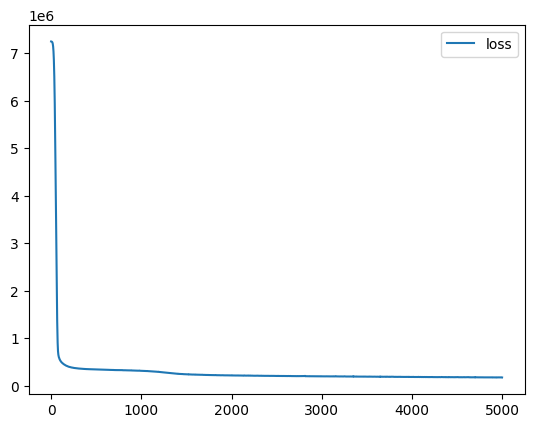

In [33]:

# create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(5,)),
        Dense(64, activation="relu"),
        Dense(64, activation="relu"),
        Dense(7, activation="linear"),
    ]
)

model.compile(loss='mse', optimizer='adam')

# early stopping
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# fit model
model.fit(x=X_train_scaled, y=y_train.values, batch_size=128, epochs=5000)

# save model
model.save('models/productionGE_weather_2020.h5')

# evaluate model
losses = pd.DataFrame(model.history.history)
losses.plot()




In [34]:
# test model
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
predictions = model.predict(X_test_scaled)
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))
print(explained_variance_score(y_test, predictions))


3/3 [==============================] - 0s 1ms/step
637320.56
365.42853
-0.5778372372899737


In [ ]:
# predict 

# load model
from tensorflow.keras.models import load_model
model = load_model('models/productionGE_weather_2020.h5')

